In [50]:
import os
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('gdp-per-capita-ppp-constant-2011.csv', index_col=0)
df.head()
idx = pd.PeriodIndex(df.index, freq='Y')
df.index=idx
y = df['GDP per capita, PPP (constant 2011 international $)']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

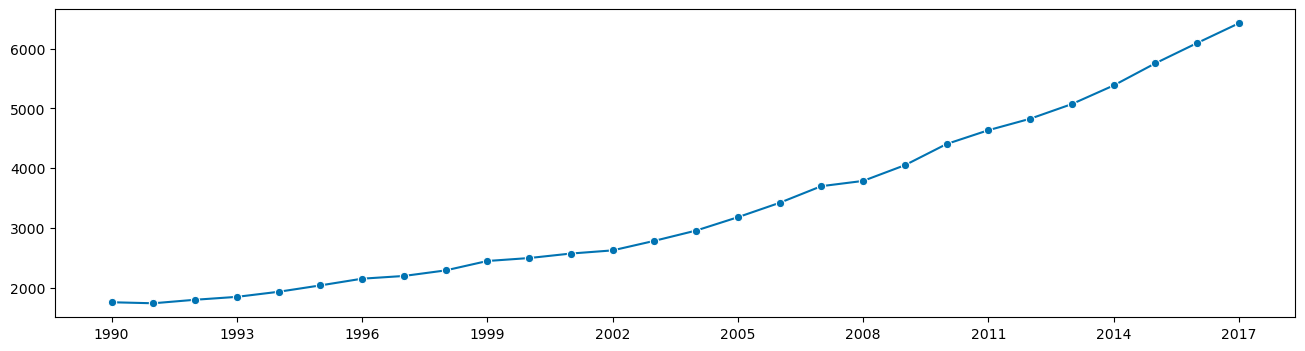

In [52]:
plot_series(df)

In [53]:
y_train, y_test = temporal_train_test_split(y,test_size=3)
print(y_train.shape, y_test.shape)

(25,) (3,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

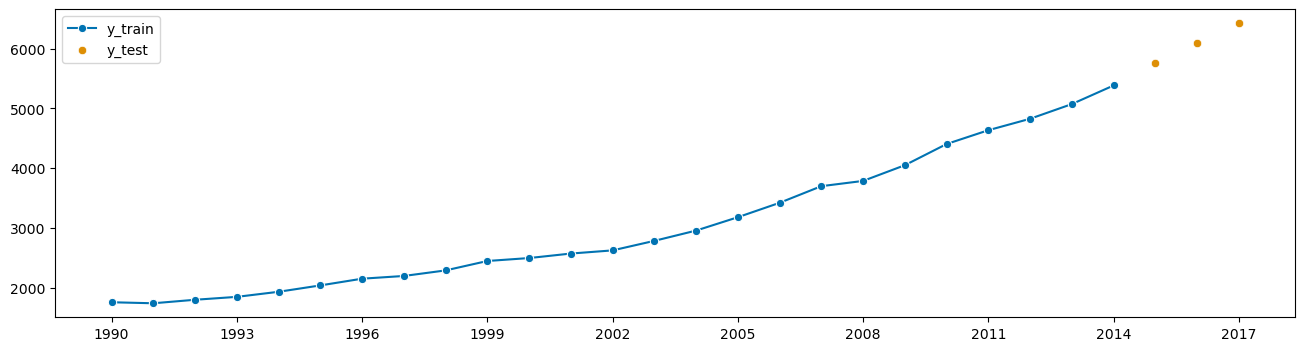

In [54]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

Specifying a forecasting horizon

In [55]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2015', '2016', '2017'], dtype='period[A-DEC]', is_relative=False)

Exponential Smoothing

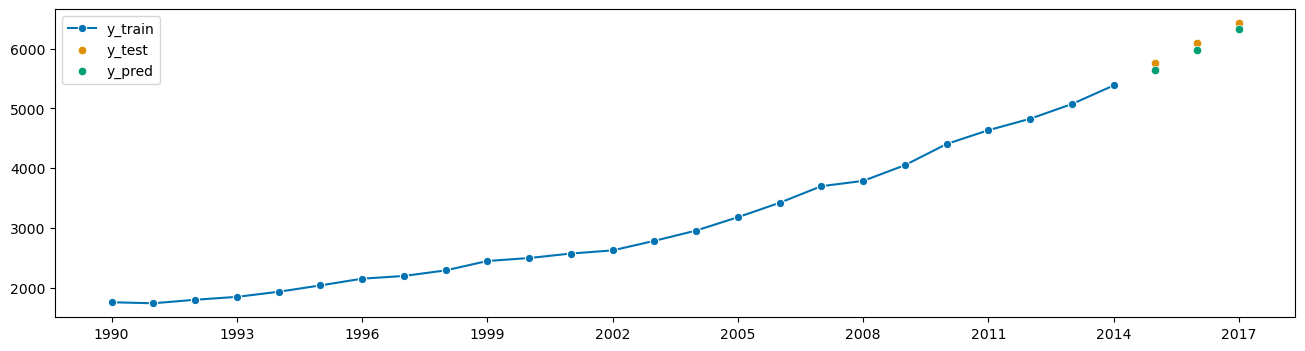

In [56]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

AutoETS

In [57]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   25
Model:                       ETS(MAN)   Log Likelihood                -138.837
Date:                Thu, 16 Nov 2023   AIC                            287.674
Time:                        18:59:54   BIC                            293.768
Sample:                    12-31-1990   HQIC                           289.364
                         - 12-31-2014   Scale                            0.000
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.250      4.004      0.000       0.510       1.489
smoothing_trend     0.4801      0.212      2.262      0.024       0.064       0.896
initial_level    1728.6730     4

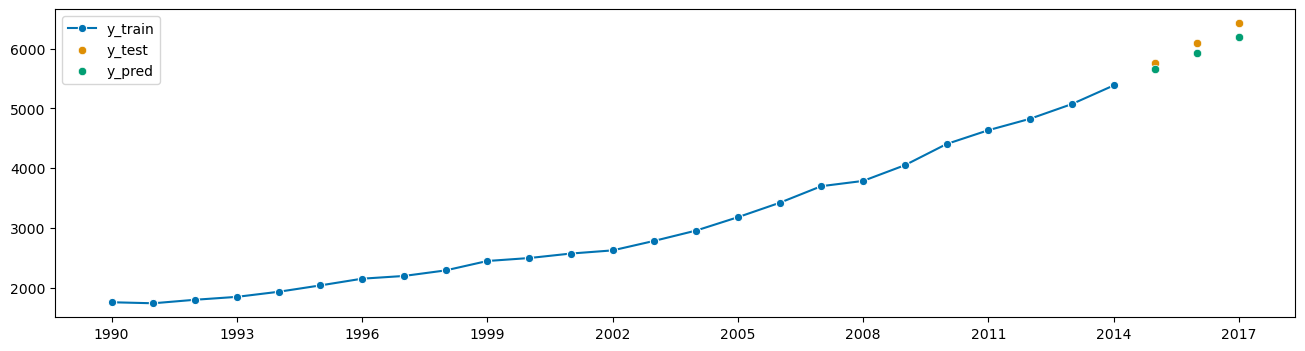

In [58]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [59]:
mean_squared_error(y_test, y_pred,square_root=True)

171.72881179473424